In [3]:
import re
import json
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import ollama

MODEL = 'snowflake-arctic-embed:latest'

file_path = '../server/simpsons_opt.txt'

strings = ['really tasty delicious', 'disgusting awful overcooked', 'intriguing and interesting taste profile', 'decent but not memorable']

def simpsons_chunks_opt(file_path):
    # Read the contents of the file
    with open(file_path, 'r') as file:
        content = file.read()
    
    chunks = content.split('\n')
    return chunks

chunks = simpsons_chunks_opt(file_path)
print(len(chunks))

print(chunks[0])

# # Regex pattern to extract the name

pattern = r'([A-Z][a-z]+ [A-Z][a-z]+):'
simpsons_dict = {}

for chunk in chunks:
    #print(chunk)
    match = re.search(pattern, chunk)
    if match:
        name = match.group(1)
        #print(name)
    embedding = ollama.embeddings(model=MODEL, prompt=chunk)
    simpsons_dict[name] = embedding['embedding']

print(simpsons_dict['Homer Simpson'])

# print(len(simpsons_dict))
# print(simpsons_dict.keys())


70
Homer Simpson: Patriarch, lazy, loves donuts, nuclear safety inspector, dimwitted, loves family, Marge, Bart, Lisa, Maggie, impulsive, bumbling, iconic catchphrases.
[0.2976181209087372, -1.5733134746551514, 0.5836377143859863, 0.5727042555809021, -0.2557753622531891, 0.284952849149704, -0.14913025498390198, -0.5297609567642212, -0.08835069835186005, -0.24943801760673523, 0.5316057205200195, -0.0001918599009513855, 0.48881641030311584, 0.4562411308288574, 0.23725944757461548, 0.09420976787805557, 0.7800534963607788, -0.1564788669347763, -0.36280208826065063, 0.21392127871513367, 1.106682538986206, -0.9726459980010986, 0.22450488805770874, 0.09183929860591888, 0.4476240873336792, 0.11629299819469452, -0.547332227230072, 0.2990039587020874, -0.0858430489897728, 0.34545958042144775, -0.4051336348056793, -0.41199004650115967, -0.19711008667945862, -0.07650204747915268, 0.6305214762687683, -0.13581237196922302, -0.20060661435127258, 0.13506890833377838, -0.2604263722896576, 0.12944178283

In [15]:
import numpy as np

# Extract embeddings and names
names = list(simpsons_dict.keys())
embeddings = np.array(list(simpsons_dict.values()))

embeddings = embeddings[:10]

#embeddings.shape
#embeddings[0]

# Perform PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

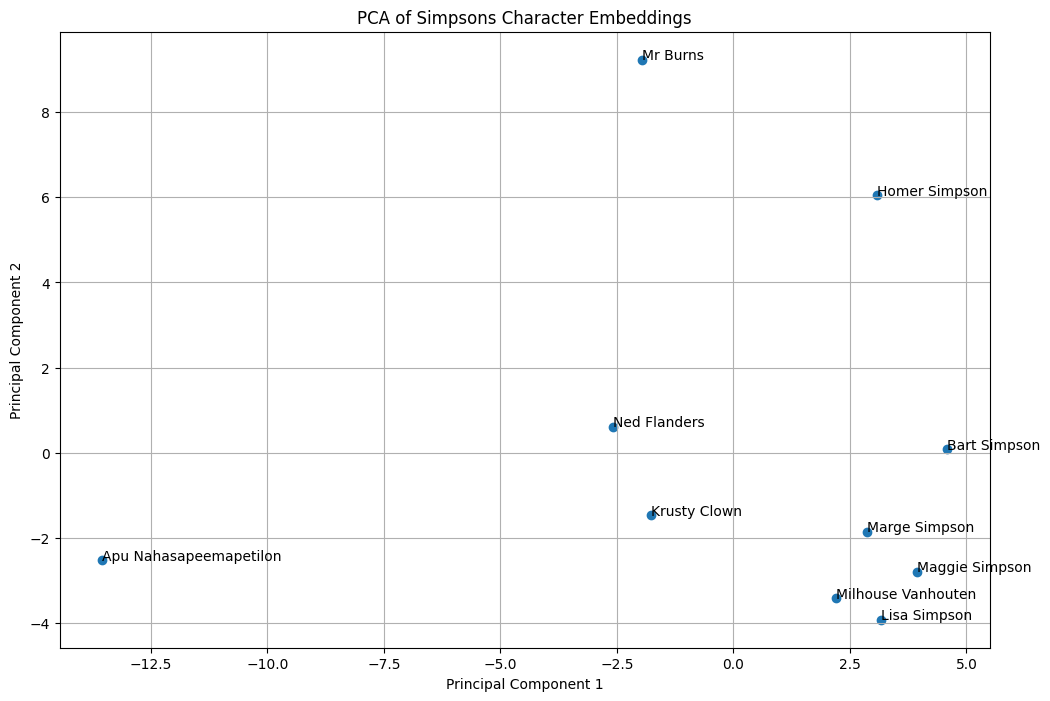

In [18]:
# Plot the 2D embeddings
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='o')

names = names[:10]

# Annotate each point with the character name
for i, name in enumerate(names):
    plt.annotate(name, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('PCA of Simpsons Character Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [19]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
embeddings_2d = pca.fit_transform(embeddings)

# Plot the 3D embeddings
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], embeddings_2d[:, 2], marker='o')

# Annotate each point with the character name
for i, name in enumerate(names):
    ax.text(embeddings_2d[i, 0], embeddings_2d[i, 1], embeddings_2d[i, 2], name, fontsize=5)

plt.title('PCA of Simpsons Character Embeddings')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

<IPython.core.display.Javascript object>

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import numpy as np

# Assuming you have your embeddings and names ready

# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
embeddings_2d = pca.fit_transform(embeddings)

# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
sc = ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], embeddings_2d[:, 2], marker='o')

# Annotate each point with the character name
for i, name in enumerate(names):
    ax.text(embeddings_2d[i, 0], embeddings_2d[i, 1], embeddings_2d[i, 2], name, fontsize=5)

# Set labels and title
plt.title('PCA of Simpsons Character Embeddings')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Enable interactive mode
plt.ion()

# Show the plot
plt.show()

# Keep the plot open
plt.ioff()
plt.show()

<IPython.core.display.Javascript object>

In [21]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import numpy as np

# Assuming you have your embeddings and names ready

# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
embeddings_2d = pca.fit_transform(embeddings)

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=embeddings_2d[:, 0],
    y=embeddings_2d[:, 1],
    z=embeddings_2d[:, 2],
    mode='markers+text',
    text=names,
    hoverinfo='text',
    marker=dict(
        size=5,
        color=embeddings_2d[:, 2],  # color by z-coordinate
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Update layout
fig.update_layout(
    title='PCA of Simpsons Character Embeddings',
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    width=900,
    height=700,
)

# Show the plot
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Create a grid
grid_size = (69,69)
#grid_size = int(np.sqrt(len(embeddings_3d)))  # Adjust this if needed
x = np.linspace(0, grid_size-1, grid_size)
y = np.linspace(0, grid_size-1, grid_size)
X, Y = np.meshgrid(x, y)

# Reshape the embeddings to fit the grid
Z = embeddings_2d[:, 2].reshape(grid_size, grid_size)

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)

# Add a color bar
fig.colorbar(surf)

# Set labels and title
ax.set_xlabel('Grid X')
ax.set_ylabel('Grid Y')
ax.set_zlabel('Embedding Z Value')
plt.title('3D Surface Plot of Character Embeddings')

TypeError: unsupported operand type(s) for -: 'tuple' and 'int'